## Simple way to get the result 

In [2]:
from empyrial import *

In [3]:
test = pd.read_csv('Toy_data.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8184 entries, 0 to 8183
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            8184 non-null   object 
 1   VIX Index       8183 non-null   float64
 2   MOVE Index      8184 non-null   float64
 3   MXWD Index      8184 non-null   float64
 4   SBWGU Index     8184 non-null   float64
 5   SPGSCI Index    8184 non-null   float64
 6   .TED G Index    8184 non-null   float64
 7   KOSPI2 Index    8182 non-null   float64
 8   SPX Index       8184 non-null   float64
 9   SX5E Index      8184 non-null   float64
 10  NKY Index       8184 non-null   float64
 11  UKX Index       8184 non-null   float64
 12  HSI Index       8184 non-null   float64
 13  MXWO000V Index  8184 non-null   float64
 14  MXWOMOM Index   8184 non-null   float64
 15  MXUS000V Index  8184 non-null   float64
 16  MXUSMMT Index   7033 non-null   float64
 17  MXUSQU Index    8184 non-null   f

In [4]:
target = pd.read_csv('Toy_data_target.csv')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10793 entries, 0 to 10792
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10793 non-null  object 
 1   TLT     8185 non-null   float64
 2   EMB     7380 non-null   float64
 3   AGG     10793 non-null  float64
 4   Cash    8964 non-null   float64
 5   SPY     10793 non-null  float64
 6   EFA     10793 non-null  float64
 7   VWO     8706 non-null   float64
 8   GLD     10793 non-null  float64
 9   DBC     8465 non-null   float64
dtypes: float64(9), object(1)
memory usage: 843.3+ KB


In [5]:
test = test.set_index('Date')
target = target.set_index('Date')


In [6]:
test = test['1995-01-01': '2021-04-30']
target = target['1995-01-01':'2021-04-30']

In [7]:
# concat in one dataframe

df = pd.concat([target, test], axis=1)
df.head()

,TLT,EMB,AGG,Cash,SPY,EFA,VWO,GLD,DBC,VIX Index,...,HSI Index,MXWO000V Index,MXWOMOM Index,MXUS000V Index,MXUSMMT Index,MXUSQU Index,MXUSMVOL Index,DXY Curncy,GOLDLNPM Index,USYC2Y10 Index
Date,,,,,,,,,,,,,,,,,,,,,
1995-01-02,1470.46,1182.365503,4667.099919,2728.958835,5261.886319,7863.84825,4937.2,748.535156,1222.353,13.20,...,8191.04,962.9,251.48,597.34,158.06,232.88,430.74,88.72,383.25,25.45
1995-01-03,1464.59,1182.365503,4660.763607,2733.416573,5287.154257,7863.84825,4847.9,743.945313,1208.662,14.25,...,7844.14,962.9,250.52,597.34,157.25,231.87,430.83,89.11,380.90,16.85
1995-01-04,1477.60,1182.365503,4679.447604,2734.247082,5312.422195,7863.84825,4756.6,733.593750,1209.418,13.53,...,7887.01,962.9,249.30,597.34,157.80,232.31,431.33,89.31,375.60,23.35
1995-01-05,1468.32,1182.365503,4665.881397,2735.019413,5312.422195,7863.84825,4797.8,733.007813,1220.099,13.50,...,7918.38,962.9,248.67,597.34,157.36,231.93,431.11,88.98,375.30,19.35
1995-01-06,1474.49,1182.365503,4671.486596,2735.663080,5317.831268,7863.84825,4717.7,732.812500,1214.289,13.13,...,7683.25,962.9,248.17,597.34,158.28,232.42,431.67,89.61,375.20,24.25


In [45]:
b = Engine(
start_date = '2003-01-01',
portfolio = ['TLT', 'EMB', 'AGG', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC'],
optimizer = 'EF')

b.weights

[0.37497, 0.02383, 0.12412, 0.34104, 0.0, 0.0, 0.13604, 0.0]

In [46]:
p = Engine(
start_date = '2003-01-01',
portfolio = ['TLT', 'AGG', 'GLD', 'EMB', 'SPY', 'EFA', 'VWO', 'DBC'],
weights = [0.37497, 0.02383, 0.12412, 0.34104, 0.0, 0.0, 0.13604, 0.0],
benchmark = ['EFA'])

Start date: 2003-01-02 00:00:00
End date: 2021-06-15 00:00:00


,Backtest
,
Annual return,7.0%
Cumulative return,224.15%
Annual volatility,7.71 %
Winning day ratio,55.5%
Sharpe ratio,0.87
Calmar ratio,0.29
Information ratio,-0.0
Stability,0.96
Max Drawdown,-0.22 %


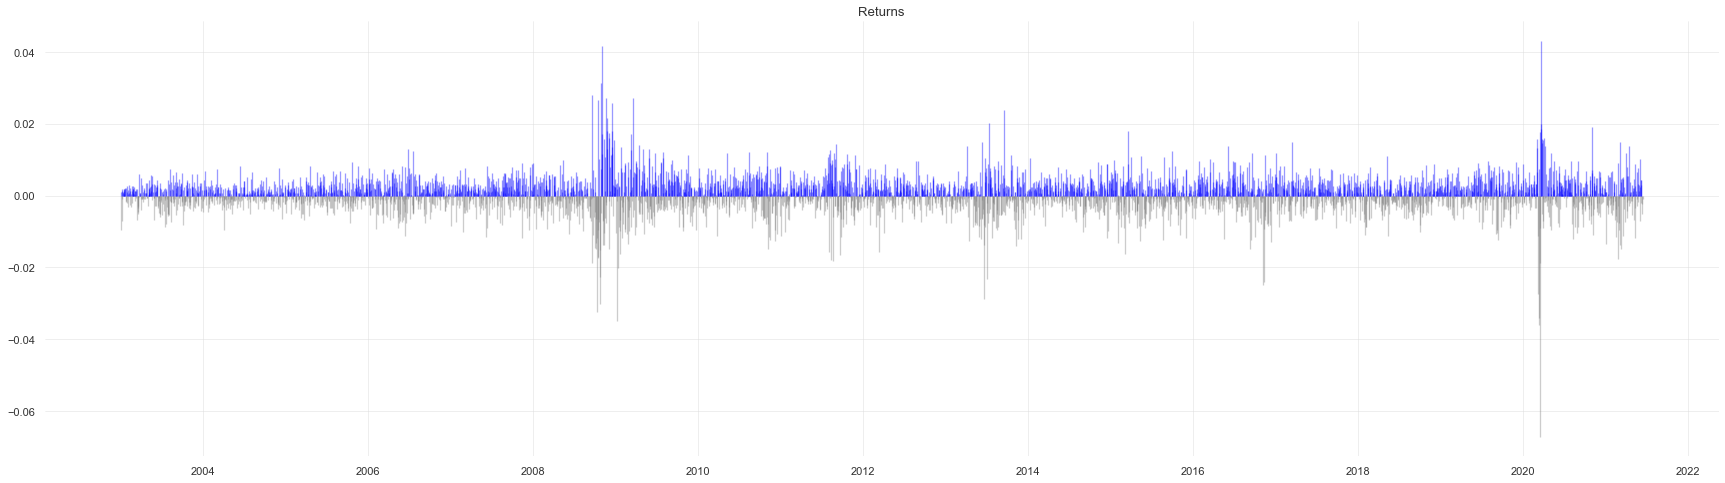

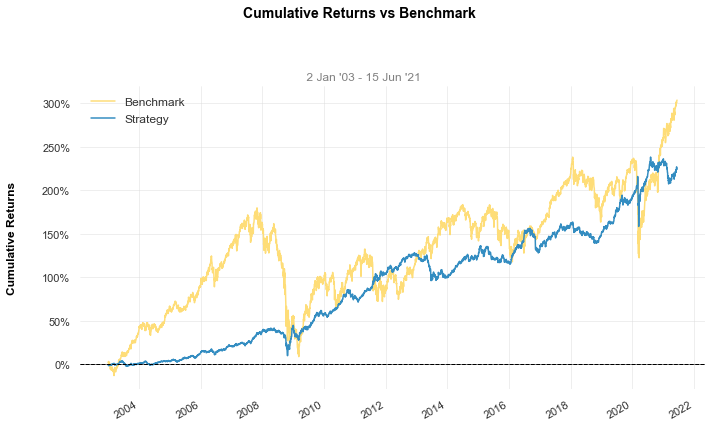

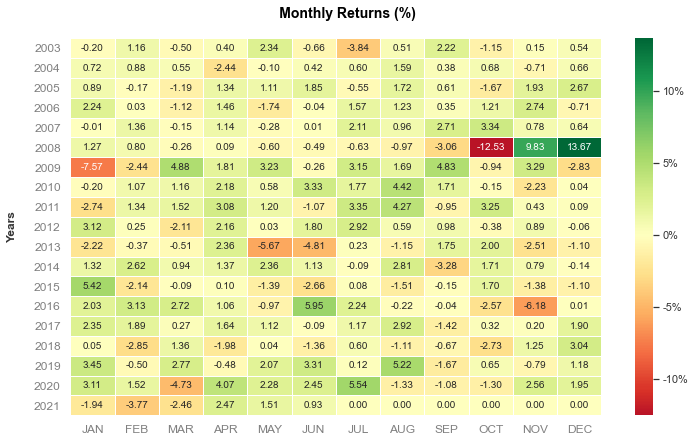

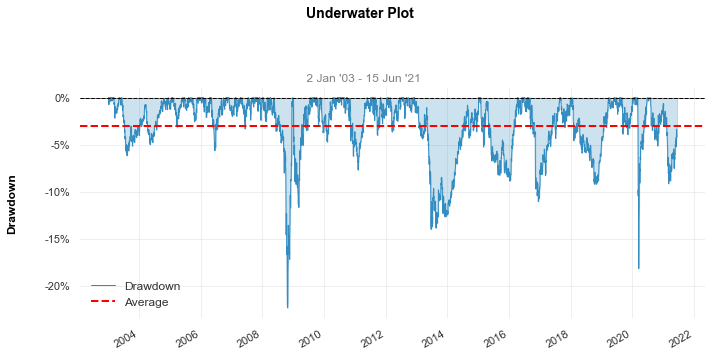

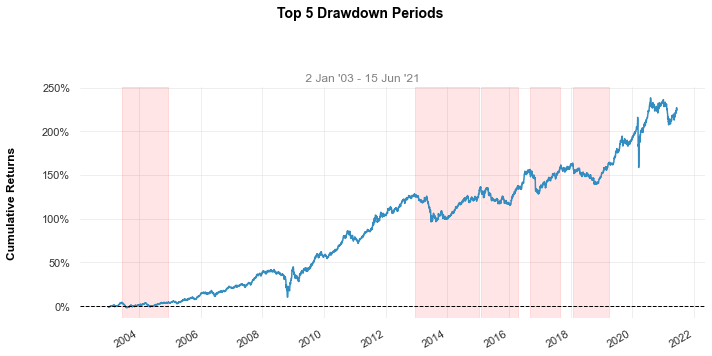

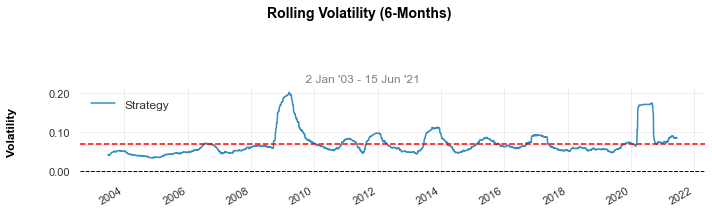

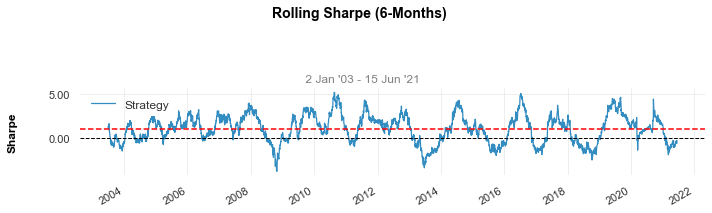

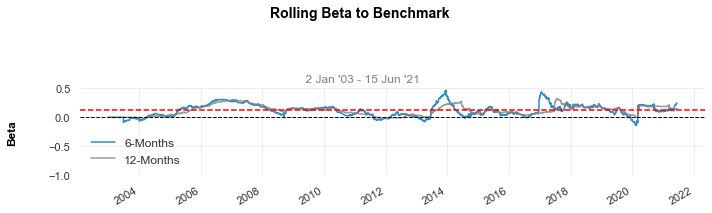

(None, None, None, None, None, None, None)

In [47]:
empyrial(p)

In [48]:
a = Engine(
start_date = '2003-01-01',
portfolio = ['TLT', 'EMB', 'AGG', 'SPY', 'EFA', 'VWO', 'GLD', 'DBC'],
weights = [0.052, 0.216, 0.241, 0.1, 0.032, 0.21, 0.09, 0.049],
benchmark = ['TLT'])


Start date: 2003-01-02 00:00:00
End date: 2021-06-15 00:00:00


,Backtest
,
Annual return,6.0%
Cumulative return,217.28%
Annual volatility,9.62 %
Winning day ratio,55.2%
Sharpe ratio,0.7
Calmar ratio,0.2
Information ratio,-0.0
Stability,0.95
Max Drawdown,-0.33 %


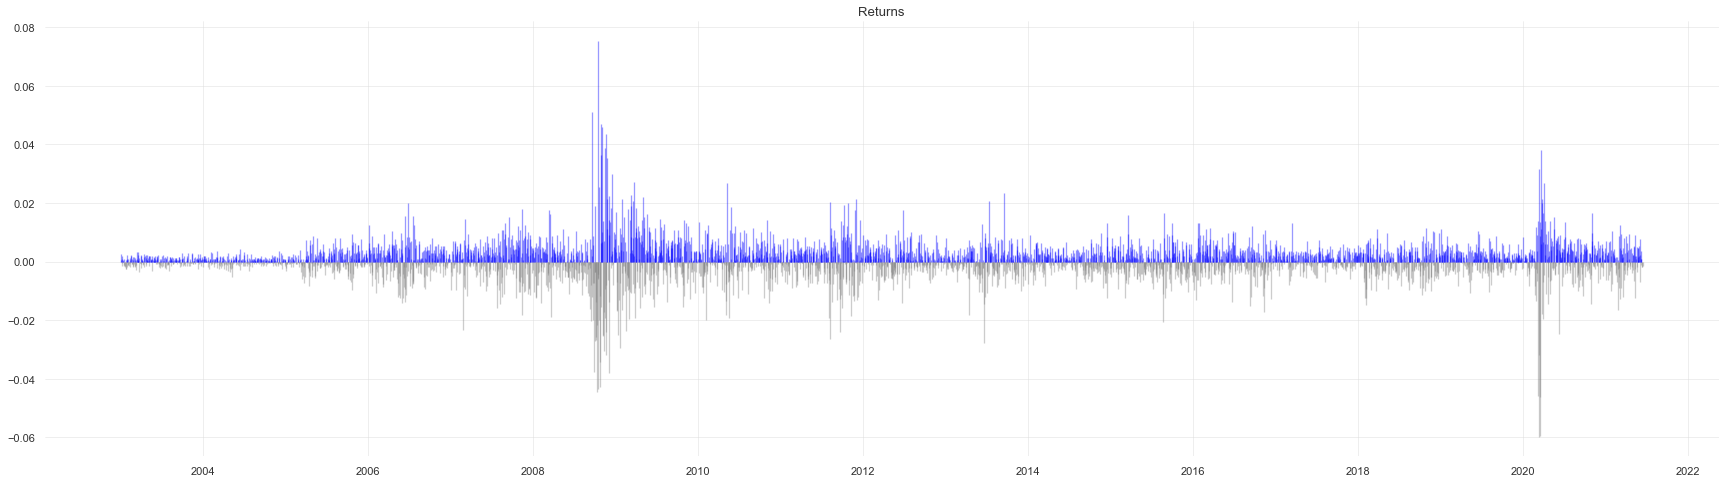

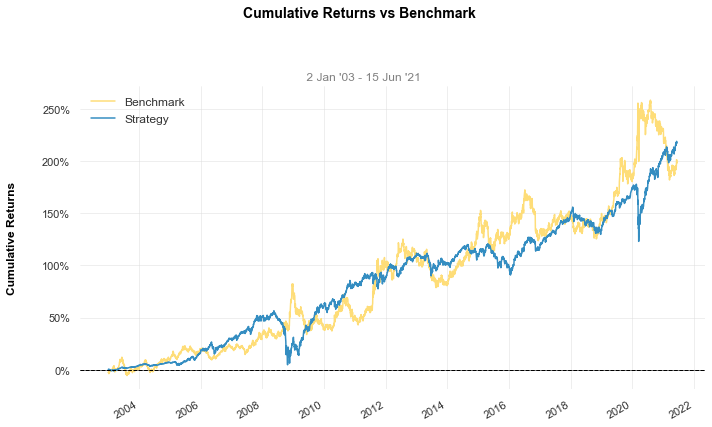

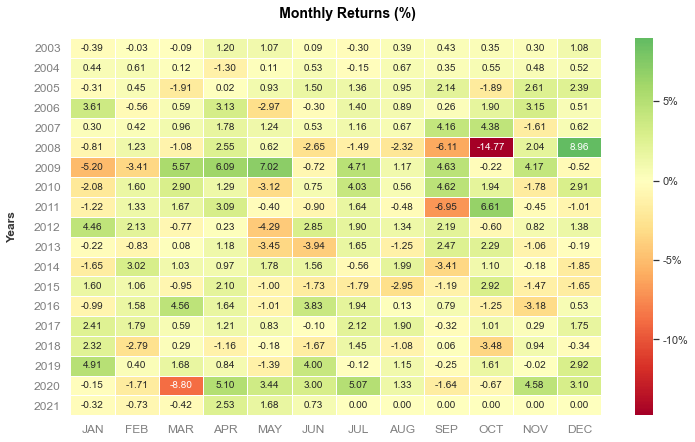

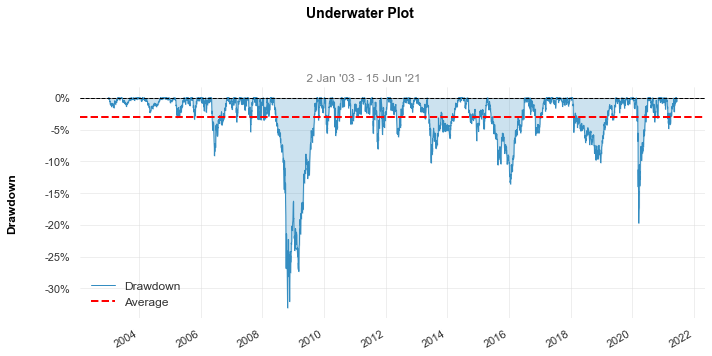

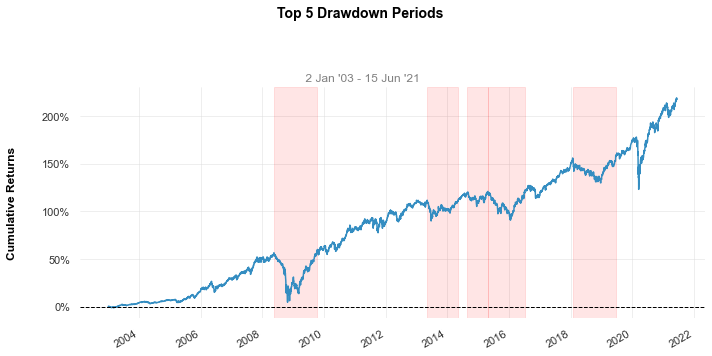

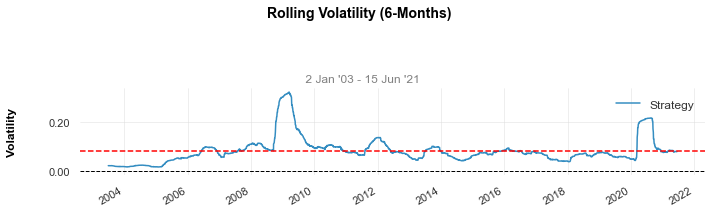

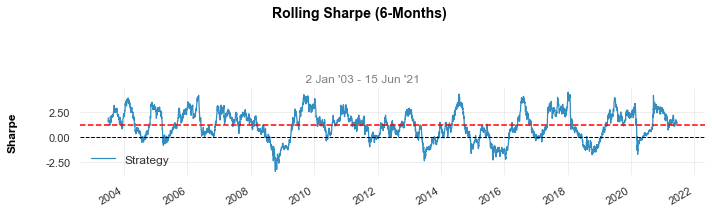

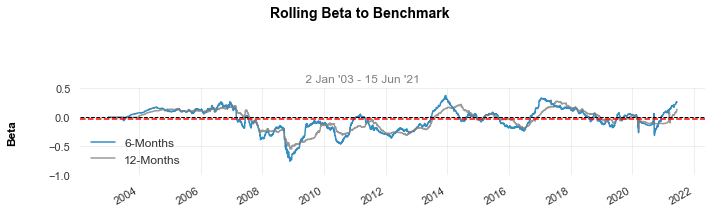

(None, None, None, None, None, None, None)

In [49]:
empyrial(a)